In [1]:
#Sales data
library(readr)
salesLeads <- read.csv("C:/Users/radha/Desktop/KaranExcel/Analyst Case Study salesLeads.csv", sep=",", header = TRUE)
print(head(salesLeads))
print(str(salesLeads))

                      Campaign.Name UTM.Medium    UTM.Source Account.Industry
1 2016_00_InboundWeb_Request_A_Demo        cpc          bing   Small Business
2 2016_00_InboundWeb_Request_A_Demo        cpc        google                 
3 2016_00_InboundWeb_Request_A_Demo                            Small Business
4 2016_00_InboundWeb_Request_A_Demo    organic www.google.ca           Dental
5 2016_00_InboundWeb_Request_A_Demo                                 Lifestyle
6 2016_00_InboundWeb_Request_A_Demo       none        direct                 
  Oppt.Close.Date      Stage Opportunity.Amount       City State.Province
1       1/20/2016 Closed Won             $4,186    Chicago             IL
2                                                                      VA
3      10/21/2016       Lost             $3,887   Lakeland             FL
4       12/2/2016       Lost             $3,887     Mocton             NB
5       11/3/2016   Forecast             $3,887 Middletown             CT
6         

In [17]:
#
library(dplyr)
salesLeadsClean <- salesLeads %>%
  filter(Stage != "",         # remove missing species_id
         Campaign.Name != "",
         UTM.Medium != "",
         UTM.Source  != "")   

print(head(salesLeadsClean))
print(str(salesLeadsClean))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



                      Campaign.Name UTM.Medium    UTM.Source Account.Industry
1 2016_00_InboundWeb_Request_A_Demo        cpc          bing   Small Business
2 2016_00_InboundWeb_Request_A_Demo    organic www.google.ca           Dental
3 2016_00_InboundWeb_Request_A_Demo    organic  www.bing.com           Dental
4 2016_00_InboundWeb_Request_A_Demo        cpc        google       Automotive
5 2016_00_InboundWeb_Request_A_Demo       none        direct       Automotive
6 2016_00_InboundWeb_Request_A_Demo    organic www.google.ca           Dental
  Oppt.Close.Date      Stage Opportunity.Amount        City State.Province
1       1/20/2016 Closed Won             $4,186     Chicago             IL
2       12/2/2016       Lost             $3,887      Mocton             NB
3        9/9/2016       Lost             $3,887     Houston          Texas
4       2/17/2016 Closed Won             $3,588 Springfield             OR
5      11/11/2016       Lost             $3,887        York             PA
6   

In [9]:
print(unique(salesLeads$Campaign.Name ))
#46 levels - values

 [1] 2016_00_InboundWeb_Request_A_Demo               
 [2] 2016_00_InboundWeb_InboundCall&Chat             
 [3] 2016_04_PPC_Google_Generic                      
 [4] 2016_09_Hotleads_EngagementPrograms             
 [5] 2016_10_Email_ZocDoc Competitive Takeaway       
 [6] 2016_00_InboundWeb_ContactUs                    
 [7] 2016_09_Tabletop_ODSM_Dental                    
 [8] 2016_05_Tradeshow_CDAAnaheim_Dental             
 [9] 2016_10_Tradeshow_ADA_Dental                    
[10] 2016_09_Tradeshow_CDA SF_Dental                 
[11] 2016_03_Roadshow_StraineWorkshop_Dental         
[12] 2016_07_Tradeshow_AAHA                          
[13] 2016_04_PPC_Google_Medical                      
[14] 2016_11_Tradeshow_GNYDM_Dental                  
[15] 2016_06_Tradeshow_FDC_Dental                    
[16] 2016_00_Inbound_SalesTeam_Referral_Registration 
[17] 2016_09_Winbacks_Dental                         
[18] 2016_10_Email_Winback_MeetNewEmployee           
[19] 2016_11_Email_Winback_T

In [6]:
print(unique(salesLeads$UTM.Medium ))
# 13 levels - values

 [1] cpc                                       organic             
 [4] none                 na                   email               
 [7] referral             phone                social              
[10] partner              Tradeshow            webinar             
[13] in-product discovery
13 Levels:  cpc email in-product discovery na none organic partner ... webinar


In [8]:
print(unique(salesLeads$UTM.Source))
# 105 levels - values

  [1] bing                                   
  [2] google                                 
  [3]                                        
  [4] www.google.ca                          
  [5] direct                                 
  [6] www.bing.com                           
  [7] www.google.com                         
  [8] r.search.yahoo.com                     
  [9] na                                     
 [10] WinOMS                                 
 [11] www.intuit.com                         
 [12] www.demandforced3.com                  
 [13] www.athenahealth.com                   
 [14] search.aol.com                         
 [15] quickbooks.intuit.com                  
 [16] email.demandforce.com                  
 [17] facebook                               
 [18] search.yahoo.com                       
 [19] www.henryschein.com                    
 [20] www.weburlopener.com                   
 [21] napatracs.com                          
 [22] local.intuit.com            

In [13]:
print(unique(salesLeads$Account.Industry))
# 8 levels - values
print(unique(salesLeads$Account.Rating))
# 8 levels - values
print(unique(salesLeads$Stage))
# % levels


[1] Small Business                              Dental               
[4] Lifestyle             Automotive            Medical              
[7] Animal Care           Professional Services
8 Levels:  Animal Care Automotive Dental Lifestyle ... Small Business
[1] Under Contract                Lost           Prospect       Cancelled     
[6] Undefined      Beta           Opportunity   
8 Levels:  Beta Cancelled Lost Opportunity Prospect ... Under Contract
[1] Closed Won            Lost       Forecast   Demo      
Levels:  Closed Won Demo Forecast Lost


<h2><font color="blue">Note: Out of 16,430 Records, only 364 having good records. Many are empty on Stage, Campaign.Name,UTM.Medium, UTM.Source</font></h2>

In [216]:
# Task 1 - Moodification in "Campaign Name" column to new "Campaign.NameMain"
# Campaign Name  Column Modification 2016_00_InboundWeb_Request_A_Demo  to  "InboundWeb"  
# salesLeads
# Campaign.Name
# convert fcator to character
library(dplyr)
slcName <- as.character(salesLeads$Campaign.Name)

#Campaign.NameNew =   strsplit(slcName , "_",fixed=FALSE)
#head(Campaign.NameNew[[2]][3])

newSalesLeaddata = salesLeads %>%   mutate( 
   Campaign.NameMain = sapply(strsplit(slcName, split="_"), "[", 3)
    )

# test new column - Campaign.NameMain. which is derived from Campaign.Name

#print(newSalesLeaddata[, c(2,10,11)])

##PPC_google is not possible, as pattern is not uniform


# A tibble: 12 x 3
# Groups:   UTM.Medium [12]
   UTM.Medium            size     n
   <fct>                <int> <int>
 1 cpc                   1120  1120
 2 email                   24    24
 3 in-product discovery     1     1
 4 na                       5     5
 5 none                   966   966
 6 organic                977   977
 7 partner                  5     5
 8 phone                  476   476
 9 referral               293   293
10 social                  24    24
11 Tradeshow               15    15
12 webinar                  2     2


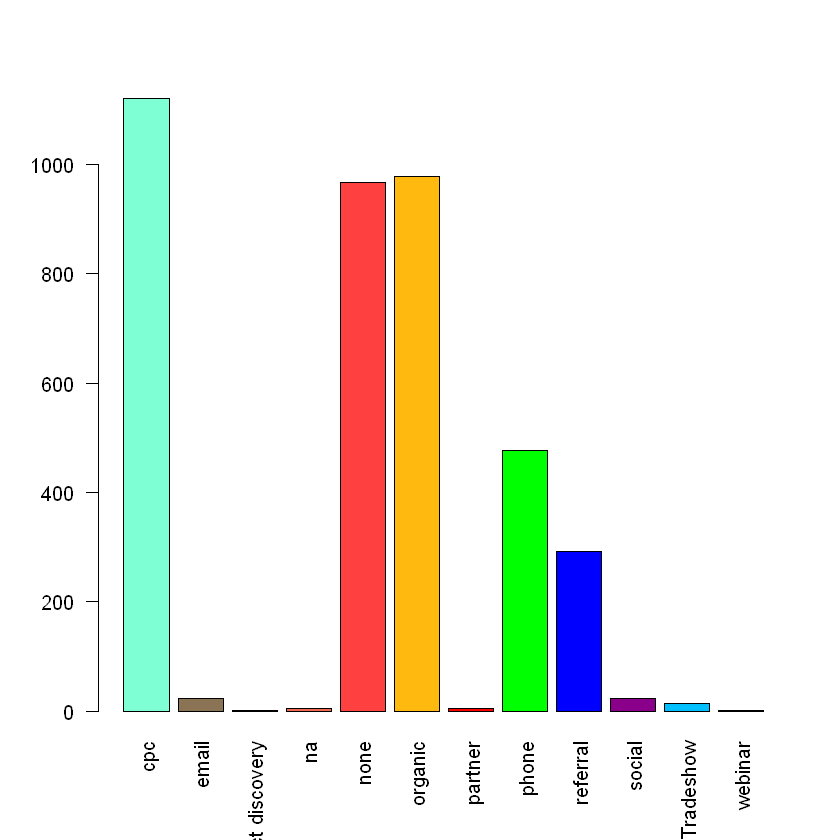

In [79]:
# Distribution of
#print(str(unique(analysis.anova$residenceType)))
## count, monthly Income  - Income Average Per Resident Type
# Removed Empty data
library(dplyr)
result <- newSalesLeaddata %>% group_by(UTM.Medium)  %>%  count( size= n())
resultClean <- result %>%   filter( UTM.Medium != "") 
print(resultClean)


category1 <- c("cpc","email","in-product discovery","na","none","organic","partner","phone","referral","social","Tradeshow","webinar" )
colr <- c("aquamarine", "burlywood4", "chartreuse1","coral2","brown1","darkgoldenrod1", "red","green","blue","darkmagenta","deepskyblue","mediumorchid1")

# orange , olivedrab2, palevioletred1
barplot(resultClean$size, names.arg=category1, col =colr,las=2)


<h3> in<b> UTM Medium </b> : CPC, none, Organic, phone referral showing more data </h3> As per above bar Diagram . Note: "none" also

<h2><font color="red">## Observe Below some Records are omitted, afetr clean. All these where stage has some value !!</font></h2>

salesLeadsClean <- salesLeads %>%
  filter(Stage != "",         # remove missing species_id
         Campaign.Name != "",
         UTM.Medium != "",
         UTM.Source  != "")  

# A tibble: 12 x 3
# Groups:   UTM.Medium [12]
   UTM.Medium            size     n
   <fct>                <int> <int>
 1 cpc                   1120  1120
 2 email                   24    24
 3 in-product discovery     1     1
 4 na                       5     5
 5 none                   966   966
 6 organic                977   977
 7 partner                  5     5
 8 phone                  476   476
 9 referral               293   293
10 social                  24    24
11 Tradeshow               15    15
12 webinar                  2     2


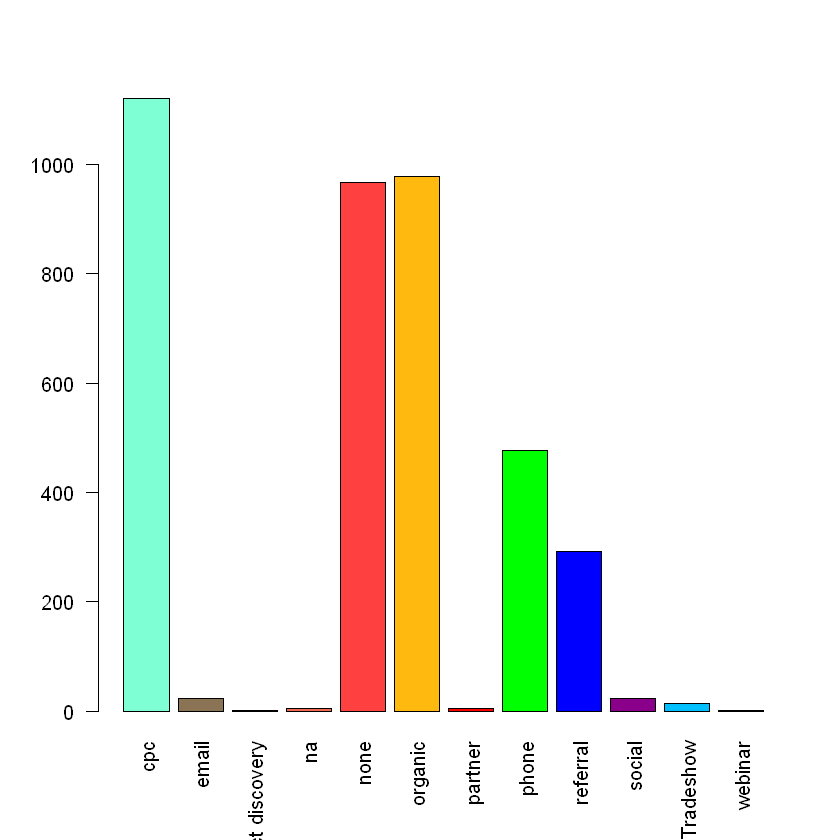

In [218]:

#-----
library(dplyr)
result <- salesLeads %>% group_by(UTM.Medium)  %>%  count( size= n())
resultClean <- result %>%   filter( UTM.Medium != "") 
print(resultClean)


category1 <- c("cpc","email","in-product discovery","na","none","organic","partner","phone","referral","social","Tradeshow","webinar" )
colr <- c("aquamarine", "burlywood4", "chartreuse1","coral2","brown1","darkgoldenrod1", "red","green","blue","darkmagenta","deepskyblue","mediumorchid1")

# orange , olivedrab2, palevioletred1
barplot(resultClean$size, names.arg=category1, col =colr,las=2)


<h3> <font  color="blue"> No "STAGE" Records on  "social","Tradeshow","webinar" . So this is NOT effective </font></h3>

In [225]:
library(dplyr)
result <- salesLeads %>% group_by(UTM.Medium,Stage)  %>%  count( size= n())
resultClean <- result %>%   filter( UTM.Medium != "" & Stage != "") 
print(resultClean)




# A tibble: 27 x 4
# Groups:   UTM.Medium, Stage [27]
   UTM.Medium           Stage       size     n
   <fct>                <fct>      <int> <int>
 1 cpc                  Closed Won    26    26
 2 cpc                  Demo          17    17
 3 cpc                  Forecast      24    24
 4 cpc                  Lost          18    18
 5 email                Closed Won     2     2
 6 email                Demo           2     2
 7 in-product discovery Forecast       1     1
 8 na                   Closed Won     1     1
 9 none                 Closed Won    26    26
10 none                 Demo          13    13
# ... with 17 more rows


<h3> Below data for Each stage to each UTM.Medium </h3>

In [226]:
#print(result)
# side by side bar chart
table1 <- table(resultClean$Stage, resultClean$UTM.Medium, dnn=c("stage", "UTM medium")) # Creates a contingency table
addmargins(table1) #Displays the table (Not necessary)


,,cpc,email,in-product discovery,na,none,organic,partner,phone,referral,social,Tradeshow,webinar,Sum
,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Closed Won,0,1,1,0,1,1,1,0,1,1,0,1,0,8
Demo,0,1,1,0,0,1,1,1,1,1,0,0,0,7
Forecast,0,1,0,1,0,1,1,1,1,1,0,0,0,7
Lost,0,1,0,0,0,1,1,0,1,1,0,0,0,5
Sum,0,4,2,1,1,4,4,2,4,4,0,1,0,27


<h3> Bar for UTM medium Vs stage  with Number(frequency) </h3>

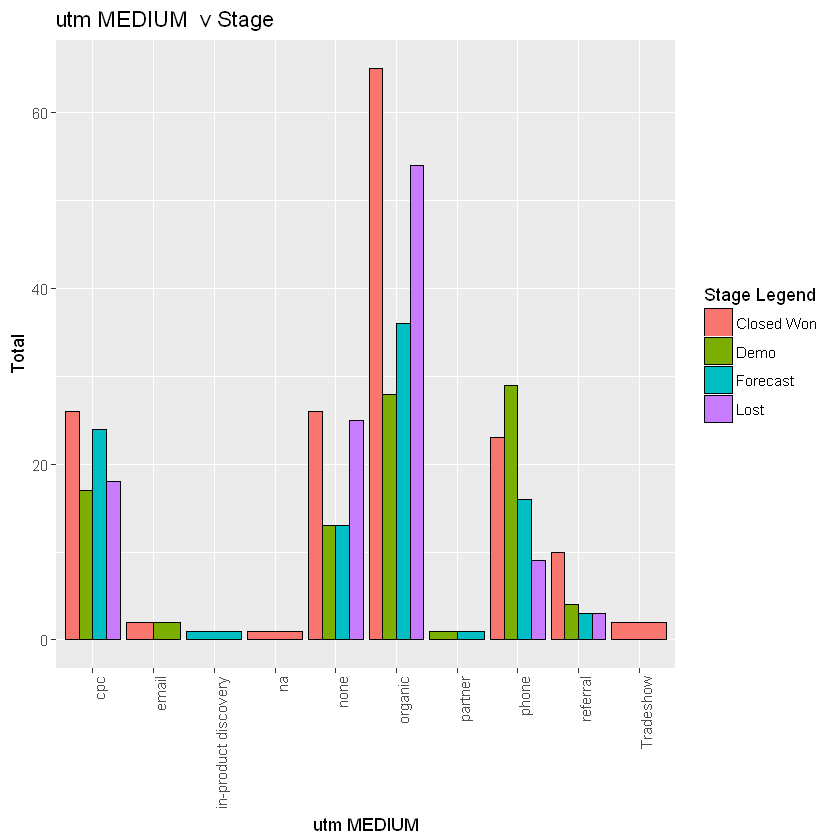

In [227]:
library(ggplot2)
# No legend, since the information is redundant
# A bar graph
q <- ggplot(data=resultClean, aes(x=UTM.Medium, y=size, fill=Stage)) + 
    geom_bar(colour="black", stat="identity", position=position_dodge(), size=.3) +                        # Thinner lines
    scale_fill_hue(name="Stage Legend") +      # Set legend title
    xlab("utm MEDIUM") + ylab("Total") + # Set axis labels
    ggtitle("utm MEDIUM  v Stage ")      # Set title
    
q + theme(axis.text.x = element_text(angle = 90, hjust = 1))

<h3> UTM SOURCE analysis </h3>

In [228]:
library(dplyr)
result <- salesLeads %>% group_by(UTM.Source,Stage)  %>%  count( size= n())
resultClean <- result %>%   filter( UTM.Source != "" & Stage != "") 
resultClean <- resultClean %>%   filter( Stage == "Closed Won") 
print(resultClean)


# A tibble: 15 x 4
# Groups:   UTM.Source, Stage [15]
   UTM.Source                    Stage       size     n
   <fct>                         <fct>      <int> <int>
 1 bing                          Closed Won     5     5
 2 client.compulinkadvantage.com Closed Won     1     1
 3 direct                        Closed Won    26    26
 4 google                        Closed Won    22    22
 5 na                            Closed Won     1     1
 6 napatracs.com                 Closed Won     1     1
 7 partner                       Closed Won     3     3
 8 r.search.yahoo.com            Closed Won     3     3
 9 search.aol.com                Closed Won     1     1
10 www.athenahealth.com          Closed Won     1     1
11 www.bing.com                  Closed Won     1     1
12 www.carestreamdental.com      Closed Won     1     1
13 www.demandforced3.com         Closed Won     2     2
14 www.google.ca                 Closed Won     4     4
15 www.google.com                Closed Won    55 

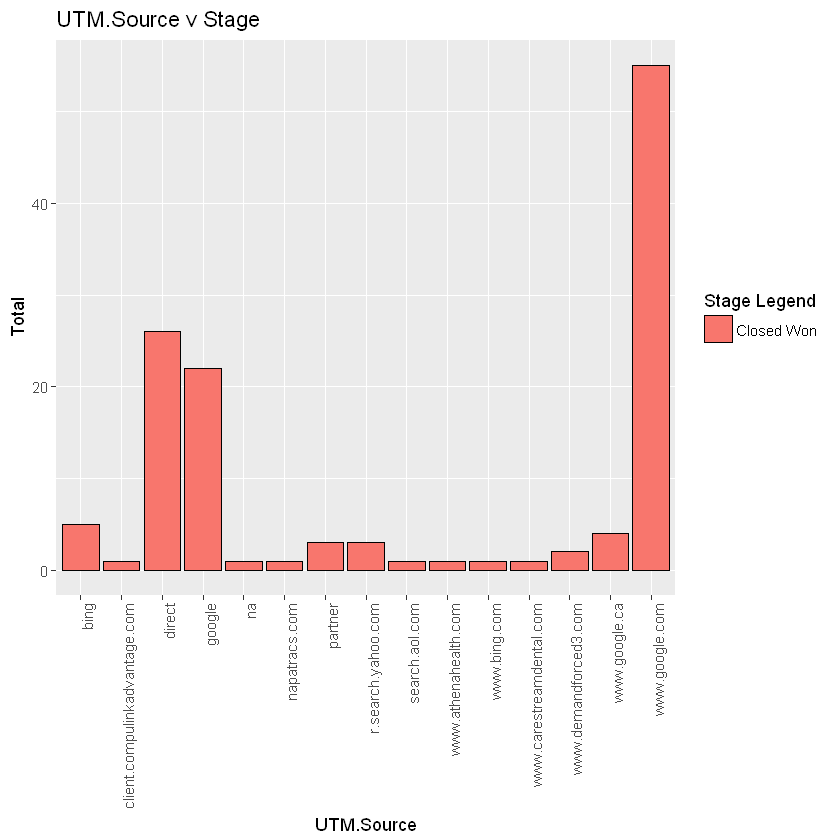

In [229]:
library(ggplot2)
# No legend, since the information is redundant
# A bar graph
q2 <- ggplot(data=resultClean, aes(x=UTM.Source, y=size, fill=Stage)) + 
    geom_bar(colour="black", stat="identity", position=position_dodge(), size=.3) +                        # Thinner lines
    scale_fill_hue(name="Stage Legend") +      # Set legend title
    xlab("UTM.Source") + ylab("Total") + # Set axis labels
    ggtitle("UTM.Source v Stage ")      # Set title
    
q2 + theme(axis.text.x = element_text(angle = 90, hjust = 1))

<h3> Google com , Direct , Bing are useful in success of the deal - Stage </h3>

In [233]:
library(dplyr)
# Q2 - aTask1 also
# mutate
slcName <- as.character(salesLeadsClean$Campaign.Name)

newSalesLeaddata = salesLeadsClean %>%   mutate( 
   Campaign.NameNew = sapply(strsplit(slcName, split="_"), "[", 3)
    )
head(newSalesLeaddata)
result <- newSalesLeaddata %>% group_by(Campaign.NameNew,Stage)  %>%  count( size= n())
resultClean <- result %>%   filter( Stage == "Closed Won") 
print(resultClean)


Campaign.Name,UTM.Medium,UTM.Source,Account.Industry,Oppt.Close.Date,Stage,Opportunity.Amount,City,State.Province,Account.Rating,Campaign.NameNew
2016_00_InboundWeb_Request_A_Demo,cpc,bing,Small Business,1/20/2016,Closed Won,"$4,186",Chicago,IL,Under Contract,InboundWeb
2016_00_InboundWeb_Request_A_Demo,organic,www.google.ca,Dental,12/2/2016,Lost,"$3,887",Mocton,NB,Lost,InboundWeb
2016_00_InboundWeb_Request_A_Demo,organic,www.bing.com,Dental,9/9/2016,Lost,"$3,887",Houston,Texas,Lost,InboundWeb
2016_00_InboundWeb_Request_A_Demo,cpc,google,Automotive,2/17/2016,Closed Won,"$3,588",Springfield,OR,Under Contract,InboundWeb
2016_00_InboundWeb_Request_A_Demo,none,direct,Automotive,11/11/2016,Lost,"$3,887",York,PA,Lost,InboundWeb
2016_00_InboundWeb_Request_A_Demo,organic,www.google.ca,Dental,5/2/2016,Lost,"$3,887",,,Cancelled,InboundWeb


# A tibble: 2 x 4
# Groups:   Campaign.NameNew, Stage [2]
  Campaign.NameNew Stage       size     n
  <chr>            <fct>      <int> <int>
1 InboundWeb       Closed Won   116   116
2 PPC              Closed Won    10    10


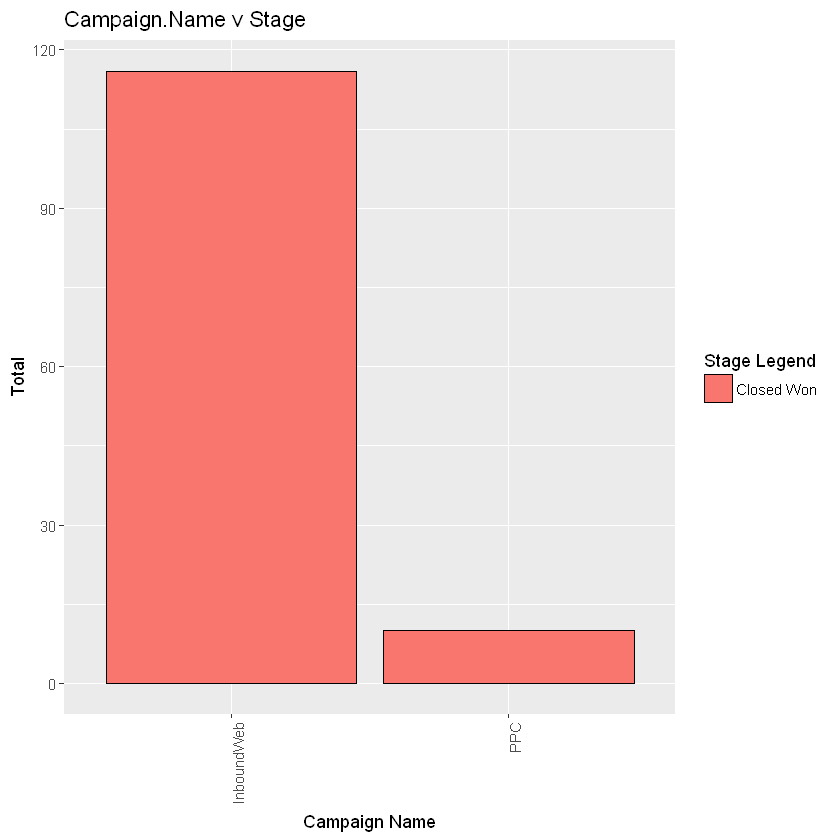

In [234]:
library(ggplot2)
# No legend, since the information is redundant
# A bar graph
q2 <- ggplot(data=resultClean, aes(x=Campaign.NameNew, y=size, fill=Stage)) + 
    geom_bar(colour="black", stat="identity", position=position_dodge(), size=.3) +                        # Thinner lines
    scale_fill_hue(name="Stage Legend") +      # Set legend title
    xlab("Campaign Name") + ylab("Total") + # Set axis labels
    ggtitle("Campaign.Name v Stage ")      # Set title
    
q2 + theme(axis.text.x = element_text(angle = 90, hjust = 1))

<h3> Campaign with "inboundweb" , "ppc"  are good for close wons </h3>

<h3> Final summary </h3>
<h3> Stage column provide status of lead like won/lost/demo etc </h3>
<h4>
1. Note: Out of 16,430 Records, only 364 having good records. Many are empty on Stage, Campaign.Name,UTM.Medium, UTM.Source
</h4>
<h4>
2. in UTM Medium : CPC, none, Organic, phone referral showing more data. Note: "none" also
</h4>
<h4>3. in UTM mdium  : No "STAGE" Records on  "social","Tradeshow","webinar" in UTM mdium. So this is NOT effective </h4>
<h4>4. in UTM mdium  : CPC, ORGANIC, None are effective </h4>

<h4>5. in UTM Source  :Google com , Direct , Bing are are good for close wons </h4>
<h4>6. in Campaign Name  : Campaign with "inboundweb" , "ppc" are good for close wons </h4>
